In [83]:
import pandas as pd

In [112]:
log = pd.read_csv('log.xls', header = None)


In [113]:
users = pd.read_csv('users.xls', sep = '\t', encoding = 'koi8-r')

In [114]:
log.columns = ['user_id', 'time', 'bet', 'win']

In [8]:
log_win = log[log['win'] > 0]
len(log_win)

138

In [9]:
def change(s):
    if s == '#error':
        return ""
    else:
        a = s.find('user')
        return s[a::]
log['user_id'] = log.user_id.apply(change)
display(log)

,user_id,time,bet,win
0,user_919,[2019-01-01 14:06:51,NaN,NaN
1,user_973,[2019-01-01 14:51:16,NaN,NaN
2,user_903,[2019-01-01 16:31:16,NaN,NaN
3,user_954,[2019-01-01 17:17:51,NaN,NaN
4,user_954,[2019-01-01 21:31:18,NaN,NaN
...,...,...,...,...
995,user_984,[2019-04-20 9:59:58,9754.0,NaN
996,,NaN,10054.0,29265.0
997,,NaN,10454.0,NaN
998,,NaN,1000.0,NaN


In [143]:
log['time'] = log.time[log.time.notna()].apply(lambda x: str(x).replace('[',''))

In [11]:
log.time.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996     True
997     True
998     True
999     True
Name: time, Length: 1000, dtype: bool

In [12]:
log2 = pd.read_csv('log.xls', header = None)

In [13]:
log2.dropna(axis=0)

,0,1,2,3
14,Запись пользователя № - user_917,[2019-01-02 8:57:36,145732.0,1987653.0
29,Запись пользователя № - user_942,[2019-01-04 13:59:42,1678321.0,9876543.0
151,Запись пользователя № - user_982,[2019-01-16 21:54:22,100.0,4749.0
189,Запись пользователя № - user_964,[2019-01-21 18:34:44,200.0,4667.0
205,Запись пользователя № - user_931,[2019-01-22 5:26:59,300.0,4319.0
...,...,...,...,...
967,Запись пользователя № - user_975,[2019-04-19 22:25:15,1000.0,6108.0
971,Запись пользователя № - user_912,[2019-04-20 10:35:49,10554.0,31799.0
972,Запись пользователя № - user_926,[2019-04-20 10:35:50,10354.0,30244.0
976,Запись пользователя № - user_970,[2019-04-20 10:35:54,10354.0,30691.0


In [14]:
log2.drop_duplicates(subset=['Запись пользователя № - user_919', '[2019-01-01 14:06:51'])

KeyError: Index(['[2019-01-01 14:06:51', 'Запись пользователя № - user_919'], dtype='object')

In [ ]:
log.time = log.time.dropna(axis=0)

In [144]:
log.time = pd.to_datetime(log.time)

In [ ]:
max(log.time)

In [ ]:
log.time.head(14)

In [149]:
log.time.dt.hour.value_counts()

10    52
1     50
3     50
8     49
6     47
17    45
5     45
4     43
18    42
14    42
12    42
13    41
22    41
2     40
23    39
9     39
0     37
15    37
20    37
21    35
11    34
16    33
19    33
7     32
Name: time, dtype: int64

In [ ]:
log = pd.read_csv('log.xls')
log.columns = ['user_id', 'time', 'bet', 'win']
log.dropna(axis=0)
log['time'] = log.time[log.time.notna()].apply(lambda x: str(x).replace('[',''))
log.time = pd.to_datetime(log.time)
log['hour'] = log.time.dt.hour


In [ ]:
log.head()

In [ ]:
import pandas as pd
log = pd.read_csv('log.xls')
log.columns = ['user_id', 'time', 'bet', 'win']
log = log.dropna(axis=0)
log['time'] = log.time[log.time.notna()].apply(lambda x: str(x).replace('[',''))
log.time = pd.to_datetime(log.time)
log['hour'] = log.time.dt.hour

In [ ]:
log.head()

In [15]:
log.bet = log['bet'].fillna(0)

In [16]:
import numpy as np
def fillna_win(row): 
    if np.isnan(row[3]): 
        if int(row[2]) == 0:
            row[3] = 0
        else:
            row[3] = -row[2]
    return row

log.win = log.apply(lambda row: fillna_win(row), axis=0) 
print(log.win)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [17]:
log.win

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
995        NaN
996    29265.0
997        NaN
998        NaN
999        NaN
Name: win, Length: 1000, dtype: float64

In [18]:
log.bet

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
        ...   
995     9754.0
996    10054.0
997    10454.0
998     1000.0
999    10754.0
Name: bet, Length: 1000, dtype: float64

In [19]:
sum(log.bet == 0.0 and log.win != 0)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [115]:
log = pd.read_csv("log.xls", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['win'] = log['win'].fillna(0)
log['bet'] = log['bet'].fillna(0)
log.head(25)

,user_id,time,bet,win
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,0.0,0.0
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,0.0,0.0
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,0.0,0.0
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,0.0,0.0
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,0.0,0.0
5,Запись пользователя № - user_917,[2019-01-01 23:34:55,156789.0,0.0
6,Запись пользователя № - user_900,[2019-01-01 4:37:25,0.0,0.0
7,Запись пользователя № - user_980,[2019-01-01 6:31:23,0.0,0.0
8,Запись пользователя № - user_906,[2019-01-02 10:57:08,0.0,0.0
9,Запись пользователя № - user_952,[2019-01-02 16:55:06,0.0,0.0


In [99]:
def fillna_win(row):
    if row.bet > 0 and row.win == 0:
        row.win = -row.bet
    return row.win
log['win'] = log.apply(lambda row: fillna_win(row), axis=1)
log.head(25)

user_id    Запись пользователя № - user_919
time                   [2019-01-01 14:06:51
bet                                       0
win                                       0
Name: 0, dtype: object
user_id    Запись пользователя № - user_973
time                   [2019-01-01 14:51:16
bet                                       0
win                                       0
Name: 1, dtype: object
user_id    Запись пользователя № - user_903
time                   [2019-01-01 16:31:16
bet                                       0
win                                       0
Name: 2, dtype: object
user_id    Запись пользователя № - user_954
time                   [2019-01-01 17:17:51
bet                                       0
win                                       0
Name: 3, dtype: object
user_id    Запись пользователя № - user_954
time                   [2019-01-01 21:31:18
bet                                       0
win                                       0
Name: 4, dtype: object
user_

,user_id,time,bet,win
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,0.0,0.0
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,0.0,0.0
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,0.0,0.0
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,0.0,0.0
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,0.0,0.0
5,Запись пользователя № - user_917,[2019-01-01 23:34:55,156789.0,-156789.0
6,Запись пользователя № - user_900,[2019-01-01 4:37:25,0.0,0.0
7,Запись пользователя № - user_980,[2019-01-01 6:31:23,0.0,0.0
8,Запись пользователя № - user_906,[2019-01-02 10:57:08,0.0,0.0
9,Запись пользователя № - user_952,[2019-01-02 16:55:06,0.0,0.0


In [100]:
len(log[log['win'] < 0])

347

In [101]:
log.win

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
        ...   
995    -9754.0
996    29265.0
997   -10454.0
998    -1000.0
999   -10754.0
Name: win, Length: 1000, dtype: float64

In [116]:
log["net"] = log.win - log.bet

In [103]:
log[log['net'] > 0].median()

bet     600.0
win    5935.0
net    5347.0
dtype: float64

In [104]:
log.bet.mean()

3291.083

In [105]:
log.bet.mean(skipna=False)

3291.083

In [106]:
pd.mean(log['bet'])

AttributeError: module 'pandas' has no attribute 'mean'

In [107]:
log.bet.sum() / log.bet.dropna().shape[0]

3291.083

In [108]:
np.mean(log.bet)

3291.083

In [109]:
log['bet'].dropna().mean()

3291.083

In [110]:
len(log[log['bet'] > 0])/len(log.bet)

0.485

In [118]:
log[log['net'] < 0].net.mean()

-3372.743515850144

In [124]:
import pandas as pd
log = pd.read_csv('log.xls', header = None)
log.columns = ['user_id', 'time', 'bet', 'win']
minst = log['bet'].min()
min_bet_amount = log[log.bet == minst].bet.count()
min_bet_amount

48

In [128]:
users.columns = ['user_id', 'email', 'geo'] 
users.user_id = users.user_id.apply(lambda x: x.lower())  
# Избавимся от ошибок в user_id  
log = log[log.user_id != '#error']  
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])  

In [129]:
pd.merge(users, log, on='user_id')  

,user_id,email,geo,time,bet,win
0,user_943,Accumanst@gmail.com,Ижевск,[2019-01-06 21:06:57,NaN,NaN
1,user_943,Accumanst@gmail.com,Ижевск,[2019-01-10 12:16:22,100.0,NaN
2,user_943,Accumanst@gmail.com,Ижевск,[2019-01-27 1:18:47,100.0,NaN
3,user_943,Accumanst@gmail.com,Ижевск,[2019-02-10 11:09:24,100.0,5456.0
4,user_943,Accumanst@gmail.com,Ижевск,[2019-02-12 15:09:38,300.0,5245.0
...,...,...,...,...,...,...
970,user_965,Visuareda@yahoo.com,Воронеж,[2019-04-20 12:55:41,800.0,6927.0
971,user_921,Aavast@ya.ru,Ижевск,[2019-01-07 1:05:59,NaN,NaN
972,user_921,Aavast@ya.ru,Ижевск,[2019-02-05 14:08:57,NaN,NaN
973,user_921,Aavast@ya.ru,Ижевск,[2019-02-09 23:20:21,400.0,6067.0


In [130]:
log = pd.read_csv("log.xls", header=None)
users = pd.read_csv('users.xls', sep = '\t', encoding = 'koi8-r')
users.columns = ['user_id', 'email', 'geo'] 
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = log['time'][log['time'].notna()].apply(lambda x: x[1:])
log['time'] = pd.to_datetime(log['time'])
log['bet'] = log['bet'].fillna(0)
log['win'] = log['win'].fillna(0)
log['net'] = log['win'] - log['bet']
users['user_id'] = users['user_id'].apply(lambda x: x.lower())
log = log[log.user_id != '#error']
log['user_id'] = log['user_id'].str.split(' - ').apply(lambda x: x[1])
df = pd.merge(log, users, on='user_id')
df.groupby('user_id').net.sum().median()

1986.0

In [140]:
df[df.bet > 0].groupby('geo').bet.mean().max() / df[df.bet > 0].groupby('geo').bet.mean().min()

127.81602335164835

In [141]:
log = pd.read_csv("log.xls", header=None)
users = pd.read_csv('users.xls', sep = '\t', encoding = 'koi8-r')
users.columns = ['user_id', 'email', 'geo'] 
log.columns = ['user_id', 'time', 'bet', 'win']
users['user_id'] = users['user_id'].apply(lambda x: x.lower())
log = log[log.user_id != '#error']
df = pd.merge(log, users, on='user_id')
df.groupby('user_id').user_id.count()

Series([], Name: user_id, dtype: int64)

In [145]:
log.time.dt.month(inplace=True)

TypeError: 'Series' object is not callable

In [146]:
log['time'].apply(lambda x: x.month())

TypeError: 'int' object is not callable

In [147]:
log['time'].apply(lambda pandas_dataframe: pandas_dataframe.month)

0      1
1      1
2      1
3      1
4      1
      ..
991    4
992    4
993    4
994    4
995    4
Name: time, Length: 985, dtype: int64

In [148]:
log.time.dt.month

0      1
1      1
2      1
3      1
4      1
      ..
991    4
992    4
993    4
994    4
995    4
Name: time, Length: 985, dtype: int64

In [150]:
import numpy as np
apartment = np.array([59.50, 31.40, 19, 2, 60550, 2])

In [151]:
share_living_space = apartment[1]/apartment[0]

In [152]:
apartment = np.delete(apartment, [0, 1])

In [153]:
apartment = np.append(apartment, share_living_space)

In [155]:
apartment[4]

0.5277310924369748

In [158]:
a = np.array([2,3,2.5])
b = np.array([120,150,90])
c = np.array([130,130,130])

In [159]:
a*72 + b + c

array([394., 496., 400.])

In [160]:
# скалярное произведение
np.dot(b,c)

46800

In [161]:
Hut_Paradise_DF = pd.DataFrame({'1.Rent': [65, 70, 120, 35, 40, 50, 100, 90, 85], 
                                '2.Area': [50, 52, 80, 33, 33, 44, 80, 65, 65], 
                                '3.Rooms':[3, 2, 1, 1, 1, 2, 4, 3, 2],
                                '4.Floor':[5, 12, 10, 3, 6, 13, 8, 21, 5], 
                                '5.Demo two weeks':[8, 4, 5, 10, 20, 12, 5, 1, 10], 
                                '6.Liv.Area': [37, 40, 65, 20, 16, 35, 60, 50, 40]})

In [164]:
A = Hut_Paradise_DF.values

In [165]:
A[4]

array([40, 33,  1,  6, 20, 16], dtype=int64)

In [166]:
A[:,1]-A[:,5]

array([13, 12, 15, 13, 17,  9, 20, 15, 25], dtype=int64)

In [168]:
A[:,0]*0.4

array([26., 28., 48., 14., 16., 20., 40., 36., 34.])

In [169]:
a = np.array([10,20,30,15,5,40,20,8,20])

In [170]:
print(Hut_Paradise_DF.iloc[:,4]@a)

1348


In [171]:
u=np.array([3,0,1,1,1])
v=np.array([0,1,0,2,-2])
w=np.array([1,-4,-1,0,-2])

In [173]:
(2*v - 3*w)@u

0

In [174]:
u/(u@u)**0.5

array([0.8660254 , 0.        , 0.28867513, 0.28867513, 0.28867513])

In [175]:
v/(v@v)**0.5

array([ 0.        ,  0.33333333,  0.        ,  0.66666667, -0.66666667])

In [176]:
w/(w@w)**0.5

array([ 0.21320072, -0.85280287, -0.21320072,  0.        , -0.42640143])

In [177]:
import numpy as np

Husband_Income = np.array([100,220,140])
Wife_Income = np.array([150,200,130])
Mother_In_Law_Income = np.array([90,80,100])

Husband_Сonsumption = np.array([50,50,60])
Wife_Сonsumption = np.array([100,80,140])
Mother_In_Law_Сonsumption = np.array([100,20,140])

In [188]:
B = np.array([Husband_Income,Wife_Income,Mother_In_Law_Income])

In [189]:
B = B.T

In [190]:
B

array([[100, 150,  90],
       [220, 200,  80],
       [140, 130, 100]])

In [191]:
C = np.array([Husband_Сonsumption,Wife_Сonsumption,Mother_In_Law_Сonsumption])

In [192]:
C = C.T
C

array([[ 50, 100, 100],
       [ 50,  80,  20],
       [ 60, 140, 140]])

In [195]:
B = B*0.87

In [196]:
P = B - C
P

array([[ 37. ,  30.5, -21.7],
       [141.4,  94. ,  49.6],
       [ 61.8, -26.9, -53. ]])

In [197]:
A = np.array([[5,-1,3,1,2], [-2,8,5,-1,1]])
x = np.array([1,2,3,4,5])

In [199]:
np.dot(A,x)

array([26, 30])

In [200]:
A=np.array( [ [1,9,8,5] , [3,6,3,2] , [3,3,3,3], [0,2,5,9], [4,4,1,2] ] )
B=np.array( [ [1,-1,0,1,1] , [-2,0,2,-1,1] ] )

In [201]:
np.dot(B,A)

array([[  2,   9,  11,  14],
       [  8, -10, -14, -11]])

In [202]:
x = np.array([1,2,1,0,4])
y = np.array([2,1,-1,1,0])
z = np.array([-1,1,-1,0,0])

In [204]:
W = np.array([x,y,z])

In [205]:
np.dot(W,W.T)

array([[22,  3,  0],
       [ 3,  7,  0],
       [ 0,  0,  3]])

In [206]:
Count_DF = pd.DataFrame({'Женские стрижки': [10, 2, 12, 4, 6, 10, 22, 7], 
                                'Мужские стрижки': [5, 21, 12, 8, 25, 3, 1, 0], 
                                'Окрашивания':[12, 3, 0, 18, 27, 2, 4, 31],
                              'Укладка':[15, 25, 30, 14, 25, 17, 25, 31],
                                'Уход':[10, 6, 4, 5, 18, 12, 20, 28]
                                }, 
                               index=['Аня', 'Борис', 'Вика', 'Галя', 'Дима', 'Егор', 'Женя','Юра'])
Price_DF = pd.DataFrame({'Женские стрижки': [2, 1.8, 2, 1.8, 2.5, 5, 1.1, 4.5], 
                                'Мужские стрижки': [1.5, 2.5, 2, 1.2, 3.5, 5, 1, 4], 
                                'Окрашивания':[1, 1, 0, 2.8, 2, 3, 1.5, 2.5],
                              'Укладка':[0.8, 1, 0.5, 0.8, 1, 2, 0.5, 1],
                                'Уход':[1, 1, 2, 2, 1.5, 2.5, 1.7, 2] 
                                }, 
                               index=['Аня', 'Борис', 'Вика', 'Галя', 'Дима', 'Егор', 'Женя','Юра'])

In [207]:
A = Count_DF.values
B = Price_DF.values

In [208]:
A[1]*B[1]

array([ 3.6, 52.5,  3. , 25. ,  6. ])

In [219]:
com = np.array([0.8, 0.8, 0.7, 0.9, 0.9])

In [220]:
(A*B)@com

array([ 50.2 ,  74.88,  59.1 ,  67.8 , 166.6 , 113.8 ,  66.21, 157.75])

In [221]:
A=np.array( [[ 8 , 6 ,11],[ 7 , 5 , 9],[ 6 ,10,  6]])

In [222]:
np.linalg.inv(A)

array([[-1.875  ,  2.3125 , -0.03125],
       [ 0.375  , -0.5625 ,  0.15625],
       [ 1.25   , -1.375  , -0.0625 ]])

In [223]:
v1 = np.array([9, 10, 7, 7, 9])
v2 = np.array([2, 0, 5, 1, 4])
v3 = np.array([4, 0, 0, 4, 1])
v4 = np.array([3, -4, 3, -1, -4])

In [224]:
B = np.array([v1,v2,v3,v4])

In [226]:
np.linalg.matrix_rank(B)

4

In [228]:
B1 = np.dot(B,B.T)

In [229]:
np.linalg.det(B1)

3716647.9999999995

In [230]:
np.linalg.inv(B1)

array([[ 0.01711488, -0.02798543, -0.02623063,  0.01599775],
       [-0.02798543,  0.071967  ,  0.03031441, -0.02722776],
       [-0.02623063,  0.03031441,  0.07683106, -0.02640498],
       [ 0.01599775, -0.02722776, -0.02640498,  0.03479318]])

In [234]:
A=np.dot(np.array([[1,2],[-3,1],[1,2],[1,-1]]).T,np.array([[1,2],[-3,1],[1,2],[1,-1]]))

In [240]:
A=np.linalg.inv(A)

In [238]:
B=np.dot(np.array([[1,2],[-3,1],[1,2],[1,-1]]).T,np.array([1,4,5,0]))

In [241]:
np.dot(A,B)

array([-0.5,  1.6])

In [242]:
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

In [254]:
abit = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [255]:
abit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [256]:
abit = abit.drop('Serial No.', axis=1)
abit.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [257]:
C = abit.corr(method='pearson')
C

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [264]:
ab1 = abit[abit["Research"] == 1]
C1 = ab1.corr(method='pearson')
C1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.824170,0.614739,0.613318,0.443374,0.806720,NaN,0.802439
TOEFL Score,0.824170,1.000000,0.602445,0.629436,0.436199,0.784173,NaN,0.787180
University Rating,0.614739,0.602445,1.000000,0.723126,0.573881,0.692237,NaN,0.713094
SOP,0.613318,0.629436,0.723126,1.000000,0.591858,0.717750,NaN,0.708238
LOR,0.443374,0.436199,0.573881,0.591858,1.000000,0.564794,NaN,0.588558
CGPA,0.806720,0.784173,0.692237,0.717750,0.564794,1.000000,NaN,0.892489
Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance of Admit,0.802439,0.787180,0.713094,0.708238,0.588558,0.892489,NaN,1.000000


In [265]:
ab2 = abit[abit["Research"] == 0]
C2 = ab2.corr(method='pearson')
C2

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.680668,0.384715,0.371424,0.365864,0.678476,NaN,0.603827
TOEFL Score,0.680668,1.000000,0.495748,0.476563,0.470956,0.696774,NaN,0.622458
University Rating,0.384715,0.495748,1.000000,0.607496,0.484262,0.516427,NaN,0.428580
SOP,0.371424,0.476563,0.607496,1.000000,0.618680,0.547098,NaN,0.470188
LOR,0.365864,0.470956,0.484262,0.618680,1.000000,0.562517,NaN,0.542528
CGPA,0.678476,0.696774,0.516427,0.547098,0.562517,1.000000,NaN,0.752714
Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance of Admit,0.603827,0.622458,0.428580,0.470188,0.542528,0.752714,NaN,1.000000


In [266]:
Data=ab2[['TOEFL Score','CGPA']]
Data.head()

,TOEFL Score,CGPA
4,103,8.21
7,101,7.90
8,102,8.00
9,108,8.60
15,105,8.30


In [267]:
np.shape(Data)

(220, 2)

In [269]:
# Создаем вектор из единиц для коэффициента w_0 и записываем все векторы в СТОЛБЦЫ матрицы признаков А
TOEFL_Score=Data['TOEFL Score']
CGPA= Data['CGPA']
A= np.column_stack((np.ones(220), TOEFL_Score, CGPA))
A

array([[  1.  , 103.  ,   8.21],
       [  1.  , 101.  ,   7.9 ],
       [  1.  , 102.  ,   8.  ],
       [  1.  , 108.  ,   8.6 ],
       [  1.  , 105.  ,   8.3 ],
       [  1.  , 107.  ,   8.7 ],
       [  1.  , 110.  ,   8.8 ],
       [  1.  , 102.  ,   8.5 ],
       [  1.  , 114.  ,   8.4 ],
       [  1.  , 109.  ,   8.8 ],
       [  1.  ,  93.  ,   7.2 ],
       [  1.  ,  99.  ,   7.3 ],
       [  1.  , 106.  ,   8.4 ],
       [  1.  , 105.  ,   7.8 ],
       [  1.  , 105.  ,   7.5 ],
       [  1.  , 108.  ,   7.7 ],
       [  1.  , 117.  ,   9.1 ],
       [  1.  , 119.  ,   9.7 ],
       [  1.  , 110.  ,   8.  ],
       [  1.  , 103.  ,   7.7 ],
       [  1.  , 102.  ,   7.4 ],
       [  1.  ,  99.  ,   7.6 ],
       [  1.  , 104.  ,   8.3 ],
       [  1.  , 100.  ,   8.1 ],
       [  1.  , 101.  ,   8.2 ],
       [  1.  , 111.  ,   8.7 ],
       [  1.  , 112.  ,   8.92],
       [  1.  , 114.  ,   9.02],
       [  1.  , 106.  ,   8.9 ],
       [  1.  ,  99.  ,   8.22],
       [  

In [270]:
# Добавим настройку для удобного чтения значений А
np.set_printoptions(suppress=True)
A

array([[  1.  , 103.  ,   8.21],
       [  1.  , 101.  ,   7.9 ],
       [  1.  , 102.  ,   8.  ],
       [  1.  , 108.  ,   8.6 ],
       [  1.  , 105.  ,   8.3 ],
       [  1.  , 107.  ,   8.7 ],
       [  1.  , 110.  ,   8.8 ],
       [  1.  , 102.  ,   8.5 ],
       [  1.  , 114.  ,   8.4 ],
       [  1.  , 109.  ,   8.8 ],
       [  1.  ,  93.  ,   7.2 ],
       [  1.  ,  99.  ,   7.3 ],
       [  1.  , 106.  ,   8.4 ],
       [  1.  , 105.  ,   7.8 ],
       [  1.  , 105.  ,   7.5 ],
       [  1.  , 108.  ,   7.7 ],
       [  1.  , 117.  ,   9.1 ],
       [  1.  , 119.  ,   9.7 ],
       [  1.  , 110.  ,   8.  ],
       [  1.  , 103.  ,   7.7 ],
       [  1.  , 102.  ,   7.4 ],
       [  1.  ,  99.  ,   7.6 ],
       [  1.  , 104.  ,   8.3 ],
       [  1.  , 100.  ,   8.1 ],
       [  1.  , 101.  ,   8.2 ],
       [  1.  , 111.  ,   8.7 ],
       [  1.  , 112.  ,   8.92],
       [  1.  , 114.  ,   9.02],
       [  1.  , 106.  ,   8.9 ],
       [  1.  ,  99.  ,   8.22],
       [  

In [280]:
# Создаем целевой вектор
y=ab2[['Chance of Admit ']] # объект типа dataframe - то, что нужно

In [281]:
# вычислим OLS оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
w_hat

,Chance of Admit
0,-1.044864
1,0.004427
2,0.148077


In [285]:
w_hat.iloc[0].round(3)

Chance of Admit    -1.045
Name: 0, dtype: float64

In [286]:
# прогноз
# добавились данные по новому абитуриенту:
TOEFL_new=107
CGPA_new=9.1
# делаем прогноз вероятности поступления
Admit_new=w_hat.iloc[0].round(3)+w_hat.iloc[1].round(3)*TOEFL_new+w_hat.iloc[2].round(3)*CGPA_new
Admit_new

Chance of Admit     0.7298
dtype: float64

In [288]:
# метод .mean() позволяет вычислить арифметическое среднее значение вектора
meanTOEFL = Data['TOEFL Score'].mean()
meanCGPA  = Data['CGPA'].mean()
mean_y = y.mean()
TOEFL_c = Data['TOEFL Score'] - meanTOEFL
CGPA_c = Data['CGPA'] - meanCGPA
y_c = y - mean_y
# вычисляем длины векторов для нормирования
TOEFL_c_norm = np.linalg.norm(TOEFL_c)
CGPA_c_norm = np.linalg.norm(CGPA_c)
y_c_norm = np.linalg.norm(y_c)
# Нормирование: делим каждый центрированный вектор на его длину
TOEFL_st=TOEFL_c / TOEFL_c_norm
CGPA_st=CGPA_c / CGPA_c_norm
y_st=y_c / y_c_norm
# Матрица центрированных признаков - БЕЗ константы!
A_st=np.column_stack((TOEFL_st, CGPA_st,))
# OLS оценка коэффициентов центрированной регрессии
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values
w_hat_st

array([[0.19044768],
       [0.62001517]])

In [311]:
A = np.array([[1, 0.9922],
    [0.9922, 1]])
B = np.linalg.eig(A)
B

(array([1.9922, 0.0078]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [300]:
v1 = np.array([1,2,1,1])

In [301]:
v2 = np.array([70,130,65,60])

In [308]:
v1m = v1-v1.mean()
v2m = v2 - v2.mean()
v1st = v1m/np.linalg.norm(v1m)
v2st = v2m/np.linalg.norm(v2m)


In [314]:
r = v1st + v2st
rm = r - r.mean()
rst = rm/np.linalg.norm(rm)
rst

array([-0.24396044,  0.86433557, -0.28811186, -0.33226327])

In [405]:
data = pd.read_csv('data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

In [317]:
test_data = pd.DataFrame([[1, 2, np.nan], [3, np.nan, 4],
                          [0, 1, 2]], columns=['one', 'two', 'three'])

In [318]:
test_data.isna()

,one,two,three
0,False,False,True
1,False,True,False
2,False,False,False


In [319]:
test_data.dropna(axis=0)

,one,two,three
2,0,1.0,2.0


In [320]:
test_data.fillna(-1)

,one,two,three
0,1,2.0,-1.0
1,3,-1.0,4.0
2,0,1.0,2.0


In [321]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [323]:
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [312]:
C = np.array([[1, 0.9922], [0.9922, 1]])
x_1 = np.array([1, 2, 1, 1])
x_2 = np.array([70, 130, 65, 60])
aigen = np.linalg.eig(C)
print(aigen)

(array([1.9922, 0.0078]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


In [332]:
st = vis_data.state.value_counts()
st.index[0]

'MI'

In [331]:
data.dropna(axis=0)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452
6,7,25,14.0,10.0,Sokol'niki,933.0,5,5050.0,5,0,...,0.513689,0.067725,0.273019,0.516979,0.822377,0.318230,0.752223,2.969315,poor,5500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30461,30466,56,29.0,13.0,Severnoe Tushino,4116.0,5,9891.0,5,0,...,0.232778,1.491458,0.648281,0.193474,0.283044,2.040548,23.720332,12.198090,satisfactory,12000000
30462,30467,56,51.0,19.0,Sviblovo,2057.0,1,3741.0,2,0,...,0.187828,0.969990,0.510751,0.566309,1.261711,0.532268,3.672399,2.988268,poor,10262010
30465,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.540003,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,25000000
30467,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.108672,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,13500000


In [333]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(test_data)

array([[0.33333333, 1.        ,        nan],
       [1.        ,        nan, 1.        ],
       [0.        , 0.        , 0.        ]])

In [334]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(test_data)

array([[-0.26726124,  1.        ,         nan],
       [ 1.33630621,         nan,  1.        ],
       [-1.06904497, -1.        , -1.        ]])

In [335]:
test_data.drop('one', axis=1)

,two,three
0,2.0,NaN
1,NaN,4.0
2,1.0,2.0


In [342]:
vis_data.balance_due.head()

0    305.0
1     75.0
2      0.0
3      0.0
4      0.0
Name: balance_due, dtype: float64

In [343]:
a = np.reshape(np.array(vis_data.balance_due),(250306,1))

In [345]:
scaler.fit_transform(a).min()

-13.147334652567258

In [346]:
u = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0])

In [347]:
u.median() - u.mean()

0.4525960609393067

In [359]:
newdata = data[data.sub_area.isin( ['Perovo', 'Lefortovo', 'Basmannoe', 'Bogorodskoe'])]

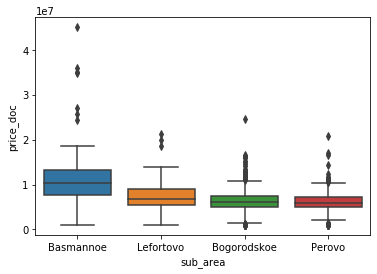

In [362]:
sns.boxplot(x=newdata.sub_area, y="price_doc", data=newdata)

In [366]:
vis_data["balance^3"] = vis_data.balance_due**3

In [367]:
vis_data["discount^3"] = vis_data.discount_amount**3

In [368]:
vis_data['balance^3'].mean()

2042000980.3445694

In [369]:
vis_data['discount^3'].mean()

3074.1760485166155

In [370]:
from sklearn.preprocessing import PolynomialFeatures

In [371]:
pf = PolynomialFeatures(3)

In [374]:
poly_features = pf.fit_transform(vis_data[['balance_due', 'discount_amount']])
poly_features

array([[  1., 305.,   0., ...,   0.,   0.,   0.],
       [  1.,  75.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.]])

In [376]:
poly_features.shape

(250306, 10)

In [378]:
display(poly_features[:,0].mean())
display(poly_features[:,1].mean())
display(poly_features[:,2].mean())
display(poly_features[:,3].mean())
display(poly_features[:,4].mean())
display(poly_features[:,5].mean())
display(poly_features[:,6].mean())
display(poly_features[:,7].mean())
display(poly_features[:,8].mean())
display(poly_features[:,9].mean())

1.0

222.44905795306545

0.12516679584188953

417195.80993348145

-9.85531709187954

11.781739151278835

2042000980.3445697

117924.38420772974

-149.56407357394548

3074.1760485166155

In [383]:
datetime_vals = pd.to_datetime(vis_data.ticket_issued_date.dropna())

In [384]:
datetime_vals.dt.weekday.value_counts()

1    57477
2    54235
3    51090
0    45071
4    40813
5     1003
6      617
Name: ticket_issued_date, dtype: int64

In [385]:
ecology_dict = {'excellent' : 4, 'good' : 3, 'satisfactory' : 2, 'poor' : 1, 'no data' : 0}

In [386]:
data.ecology = data.ecology.replace(to_replace=ecology_dict)

In [406]:
pd.get_dummies(data.sub_area,drop_first=True).shape[1]+data.shape[1]

201

In [404]:
print(data.columns)

Index(['Akademicheskoe', 'Alekseevskoe', 'Altuf'evskoe', 'Arbat',
       'Babushkinskoe', 'Basmannoe', 'Begovoe', 'Beskudnikovskoe', 'Bibirevo',
       'Birjulevo Vostochnoe',
       ...
       'Vnukovo', 'Vojkovskoe', 'Vostochnoe', 'Vostochnoe Degunino',
       'Vostochnoe Izmajlovo', 'Vyhino-Zhulebino', 'Zamoskvorech'e',
       'Zapadnoe Degunino', 'Zjablikovo', 'Zjuzino'],
      dtype='object', length=145)


In [392]:
data = data.drop('balance^3', axis = 1)

In [394]:
data.ecology.mean()

1.7282483836030063

In [421]:
newbal = vis_data.balance_due.dropna().values

In [426]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]
out = pd.DataFrame(outliers_iqr(newbal))
out.max()-out.min()

0    250281
dtype: int64

In [411]:
newbal[6]

855.0

In [427]:
ys = vis_data.balance_due.dropna().values
quartile_1, quartile_3 = np.percentile(ys, [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
outliers=[]
for i in ys:
    if (i > upper_bound) | (i < lower_bound):
        outliers.append(i)
out = pd.DataFrame(outliers)
out[0].max()-out[0].min()

18780.0

In [413]:
newbal[12]

855.0

In [414]:
newbal[250259]

1130.0

In [415]:
newbal[250274]

1130.0

In [416]:
newbal[250287]

1130.0

In [417]:
1130-855

275